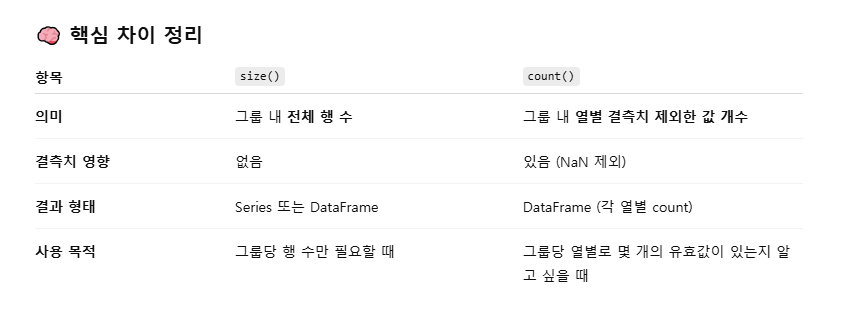

In [63]:
import pandas as pd
import numpy as np

np.random.seed(1234)

n_rows = 10

df = pd.DataFrame({
    f'col_{i+1}': np.random.randint(0, 2, size=n_rows)
    for i in range(10)
})

df.iloc[0, 5] = np.nan
# df.iloc[1, 1] = np.nan

df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,1,1,0,1,1,NaN,0,1,1,0
1,1,1,0,0,1,1.0,1,1,0,1
2,0,0,0,0,0,1.0,0,1,1,1
3,1,0,0,1,1,1.0,0,1,0,1
4,0,1,1,0,1,0.0,1,1,0,0
5,0,0,0,1,0,1.0,1,1,0,1
6,0,0,1,0,1,0.0,1,1,0,0
7,1,0,1,0,0,1.0,0,0,0,0
8,1,0,0,0,1,1.0,0,1,0,1
9,1,0,0,1,0,0.0,0,0,0,1


In [64]:
# 이 코드는 col_1, col_2, col_3의 조합으로 데이터를 그룹화하고,
# 각 그룹에 몇 개의 행이 있는지를 센 것
# 즉, 단순히 그룹별 행 개수를 세는 작업
df.groupby(['col_1', 'col_2', 'col_3']).size().reset_index(name='count')

,col_1,col_2,col_3,count
0,0,0,0,2
1,0,0,1,1
2,0,1,1,1
3,1,0,0,3
4,1,0,1,1
5,1,1,0,2


In [65]:
# 이 코드는 그룹화 후, 나머지 열들(col_4 ~ col_10)에 대해 각 열에서 결측치가 아닌 값의 개수를 셉니다.
# 즉, 각 그룹에서 열별로 결측치가 아닌 셀 수를 계산합니다.
# 행 개수와 같을 수도 있지만, 결측치가 있다면 달라질 수 있습니다.
df.groupby(['col_1', 'col_2', 'col_3']).count()

col_4  col_5  col_6  col_7  col_8  col_9  col_10
col_1 col_2 col_3                                                  
0     0     0          2      2      2      2      2      2       2
            1          1      1      1      1      1      1       1
      1     1          1      1      1      1      1      1       1
1     0     0          3      3      3      3      3      3       3
            1          1      1      1      1      1      1       1
      1     0          2      2      1      2      2      2       2

In [67]:
df.groupby(['col_1', 'col_2', 'col_3'])['col_10'].count().reset_index()

,col_1,col_2,col_3,col_10
0,0,0,0,2
1,0,0,1,1
2,0,1,1,1
3,1,0,0,3
4,1,0,1,1
5,1,1,0,2


In [75]:
df[['col_1', 'col_2']].to_csv("test.csv", header=True, index=False)